In [1]:
import pandas as pd
data = pd.read_csv('Transformed Data Set - Sheet1.csv')

data


,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [2]:

data.isnull().sum()



Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [4]:
data.rename(columns={'Favorite Color' :'FavoriteColor', 'Favorite Music Genre':'FavoriteMusicGenre', 
                          'Favorite Beverage':'FavoriteBeverage', 'Favorite Soft Drink':'FavoriteSoftDrink'}, inplace=True)


In [5]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FavoriteColor       66 non-null     int64
 1   FavoriteMusicGenre  66 non-null     int64
 2   FavoriteBeverage    66 non-null     int64
 3   FavoriteSoftDrink   66 non-null     int64
 4   Gender              66 non-null     int64
dtypes: int64(5)
memory usage: 2.7 KB


In [7]:
print(len(data))
X = data.drop('Gender',axis=1)
y = data['Gender']
print(X)
print(y)

66
    FavoriteColor  FavoriteMusicGenre  FavoriteBeverage  FavoriteSoftDrink
0               0                   6                 3                  0
1               1                   2                 3                  1
2               2                   6                 5                  1
3               2                   1                 4                  2
4               0                   6                 3                  1
..            ...                 ...               ...                ...
61              0                   6                 3                  1
62              0                   2                 0                  1
63              1                   2                 1                  2
64              0                   6                 5                  1
65              0                   0                 0                  1

[66 rows x 4 columns]
0     0
1     0
2     0
3     0
4     0
     ..
61    1
62    1
63    1
64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
#print(X_train)
print(X_test)
columns = list(X.columns)

columns

    FavoriteColor  FavoriteMusicGenre  FavoriteBeverage  FavoriteSoftDrink
54              0                   0                 1                  2
62              0                   2                 0                  1
0               0                   6                 3                  0
45              0                   2                 0                  1
5               2                   3                 1                  2
63              1                   2                 1                  2
16              0                   4                 5                  0
12              2                   4                 5                  0
65              0                   0                 0                  1
30              2                   6                 2                  1
33              2                   5                 5                  3
9               1                   4                 5                  1
41              1        

['FavoriteColor',
 'FavoriteMusicGenre',
 'FavoriteBeverage',
 'FavoriteSoftDrink']

KNN CLASSIFICATION 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
X_new = np.array([[0,6,5,1]])
prediction = knn.predict(X_new)

print("preciction:{}".format(prediction))

print("Training set score:\n{:.2f}".format(knn.score(X_train,y_train)*100))
print("Testing accuracy:\n{:.2f}".format(knn.score(X_test,y_test)*100))

preciction:[1]
Training set score:
81.82
Testing accuracy:
54.55


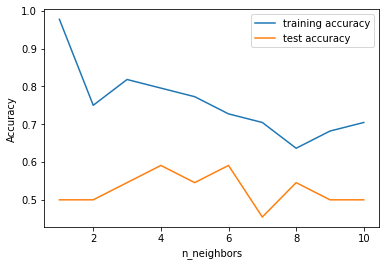

In [20]:
training_accuracy = []
test_accuracy = []
   # try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
     # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

DECISION TREES

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)

print("Training set score:{:.2f}".format(tree.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(tree.score(X_test,y_test)*100))

Training set score:97.73
Testing set score:40.91


LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression().fit(X_train,y_train)

print("Training set score:{:.2f}".format(logReg.score(X_train,y_train)*100))
print("Testing set score:{:.2f}".format(logReg.score(X_test,y_test)*100))

Training set score:65.91
Testing set score:50.00


In [13]:
logreg100 = LogisticRegression(C=0.01).fit(X_train,y_train)

print("Training set score when c=100 :\n{:.2f}".format(logreg100.score(X_train,y_train)*100))

print("Testing set score when c=100 :\n{:.2f}".format(logreg100.score(X_test,y_test)*100))



Training set score when c=100 :
70.45
Testing set score when c=100 :
50.00
